# Hospital Readmission Risk Prediction Workflow

This notebook demonstrates a complete AI workflow for predicting patient readmission risk within 30 days of discharge. It includes data generation, preprocessing, model training, evaluation, and visualization.

## 1. Mock Data Generation
We generate synthetic data to simulate hospital records, including features such as age, gender, number of previous admissions, comorbidity count, length of stay, and the target variable (readmitted within 30 days).

In [14]:
import numpy as np
import pandas as pd

np.random.seed(42)
n_samples = 1000

data = pd.DataFrame({
    'age': np.random.randint(18, 90, n_samples),
    'gender': np.random.choice(['M', 'F'], n_samples),
    'num_prev_admissions': np.random.poisson(2, n_samples),
    'comorbidity_count': np.random.poisson(3, n_samples),
    'length_of_stay': np.random.randint(1, 15, n_samples),
    'readmitted_30d': np.random.choice([0, 1], n_samples, p=[0.75, 0.25])
})
data.head()

,age,gender,num_prev_admissions,comorbidity_count,length_of_stay,readmitted_30d
0,69,M,3,3,1,0
1,32,M,2,3,6,0
2,89,F,1,1,12,0
3,78,M,3,0,8,1
4,38,M,2,4,7,0


## 2. Data Preprocessing
We encode categorical variables, handle missing values, and scale numerical features.

In [17]:
# Encode gender
data['gender'] = data['gender'].map({'M': 0, 'F': 1})

# Introduce some missing values for demonstration
for col in ['age', 'comorbidity_count']:
    data.loc[data.sample(frac=0.05).index, col] = np.nan

# Fill missing values with median
data['age'].fillna(data['age'].median(), inplace=True)
data['comorbidity_count'].fillna(data['comorbidity_count'].median(), inplace=True)

from sklearn.preprocessing import StandardScaler

X = data.drop('readmitted_30d', axis=1)
y = data['readmitted_30d']

scaler = StandardScaler()
X[['age', 'num_prev_admissions', 'comorbidity_count', 'length_of_stay']] = scaler.fit_transform(
    X[['age', 'num_prev_admissions', 'comorbidity_count', 'length_of_stay']]
)
X.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_10232\4117731695.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_10232\4117731695.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

,age,gender,num_prev_admissions,comorbidity_count,length_of_stay
0,0.790201,0,0.722273,0.008744,-1.706341
1,-1.030766,0,0.004308,0.008744,-0.445746
2,1.774507,1,-0.713657,-1.157130,1.066968
3,1.233139,0,0.722273,0.008744,0.058492
4,-0.735474,0,0.004308,0.591681,-0.193627


## 3. Model Training
We split the data and train a Random Forest classifier.

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 4. Model Evaluation
We evaluate the model using a confusion matrix, precision, recall, and F1-score.

In [23]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Confusion Matrix:
 [[143   9]
 [ 39   9]]
Precision: 0.50
Recall: 0.19
F1-Score: 0.27


## 5. Feature Importance
We examine which features are most important for the model's predictions.

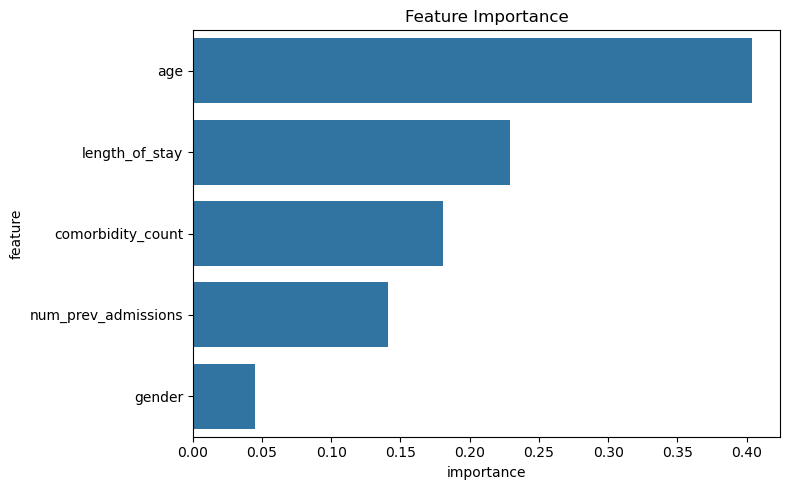

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': clf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

## 6. Prediction Probability Distribution
We visualize the distribution of predicted probabilities for each class.

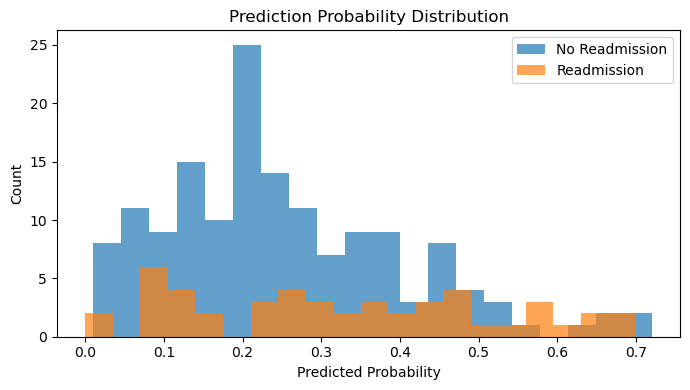

In [29]:
y_pred_proba = clf.predict_proba(X_test)[:, 1]
plt.figure(figsize=(7, 4))
plt.hist(y_pred_proba[y_test == 0], alpha=0.7, label='No Readmission', bins=20)
plt.hist(y_pred_proba[y_test == 1], alpha=0.7, label='Readmission', bins=20)
plt.title('Prediction Probability Distribution')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()